In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Data preprocessing and exploartion

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test  = mnist.test.images
Y_test  = mnist.test.labels

In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(55000, 784)
(55000,)
(10000, 784)
(10000,)


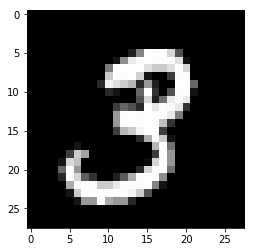

In [5]:
first_image = X_train[1]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

## Building the model
* Specify feature
* Build 2 layer DNN classifier
* Define the training inputs
* Invoke the train method to train the model over 100000 steps.

In [6]:
feature_columns = [tf.feature_column.numeric_column("x", shape=[28, 28])]

In [7]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=feature_columns,
    hidden_units=[256, 32],
    optimizer=tf.train.AdamOptimizer(1e-4),
    n_classes=10,
    dropout=0.1,
    model_dir="./mnist_model"
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './mnist_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c3209c470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [8]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x':X_train},
    y = Y_train.astype(np.int32),
    num_epochs=None,
    batch_size=50,
    shuffle=True
)

In [9]:
classifier.train(input_fn=train_input_fn, steps=100000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into ./mnist_model/model.ckpt.
INFO:tensorflow:loss = 118.371284, step = 1
INFO:tensorflow:global_step/sec: 251.002
INFO:tensorflow:loss = 83.71433, step = 101 (0.402 sec)
INFO:tensorflow:global_step/sec: 260.443
INFO:tensorflow:loss = 54.171364, step = 201 (0.383 sec)
INFO:tensorflow:global_step/sec: 287.537
INFO:tensorflow:loss = 43.74492, step = 301 (0.347 sec)
INFO:tensorflow:global_step/sec: 321.044
INFO:tensorflow:loss = 39.784855, step = 401 (0.311 sec)
INFO:tensorflow:global_step/sec: 327.407
INFO:tensorflow:loss = 34.447803, step = 501 (0.306 sec)
INFO:tensorflow:global_step/sec: 313.211
INFO:tensorflow:loss = 20.276043, step = 601 (0.318 sec)
INFO:tensorflow:global_step/sec: 344.696
INFO:tensorflow:loss

INFO:tensorflow:global_step/sec: 318.826
INFO:tensorflow:loss = 0.6858343, step = 8101 (0.313 sec)
INFO:tensorflow:global_step/sec: 308.48
INFO:tensorflow:loss = 3.2362425, step = 8201 (0.324 sec)
INFO:tensorflow:global_step/sec: 281.169
INFO:tensorflow:loss = 5.584332, step = 8301 (0.355 sec)
INFO:tensorflow:global_step/sec: 303.198
INFO:tensorflow:loss = 11.013788, step = 8401 (0.330 sec)
INFO:tensorflow:global_step/sec: 312.721
INFO:tensorflow:loss = 5.1366615, step = 8501 (0.320 sec)
INFO:tensorflow:global_step/sec: 322.021
INFO:tensorflow:loss = 5.5085864, step = 8601 (0.310 sec)
INFO:tensorflow:global_step/sec: 315.217
INFO:tensorflow:loss = 6.124089, step = 8701 (0.317 sec)
INFO:tensorflow:global_step/sec: 318.725
INFO:tensorflow:loss = 3.1639636, step = 8801 (0.314 sec)
INFO:tensorflow:global_step/sec: 316.023
INFO:tensorflow:loss = 8.746403, step = 8901 (0.317 sec)
INFO:tensorflow:global_step/sec: 336.729
INFO:tensorflow:loss = 4.7991085, step = 9001 (0.297 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 323.342
INFO:tensorflow:loss = 4.2813673, step = 16401 (0.309 sec)
INFO:tensorflow:global_step/sec: 313.253
INFO:tensorflow:loss = 1.6901649, step = 16501 (0.319 sec)
INFO:tensorflow:global_step/sec: 315.827
INFO:tensorflow:loss = 6.683874, step = 16601 (0.317 sec)
INFO:tensorflow:global_step/sec: 306.133
INFO:tensorflow:loss = 1.4951713, step = 16701 (0.327 sec)
INFO:tensorflow:global_step/sec: 313.807
INFO:tensorflow:loss = 5.383611, step = 16801 (0.319 sec)
INFO:tensorflow:global_step/sec: 320.988
INFO:tensorflow:loss = 1.8815796, step = 16901 (0.313 sec)
INFO:tensorflow:global_step/sec: 321.943
INFO:tensorflow:loss = 1.9839802, step = 17001 (0.309 sec)
INFO:tensorflow:global_step/sec: 313.845
INFO:tensorflow:loss = 9.57715, step = 17101 (0.319 sec)
INFO:tensorflow:global_step/sec: 316.704
INFO:tensorflow:loss = 2.1415062, step = 17201 (0.316 sec)
INFO:tensorflow:global_step/sec: 328.513
INFO:tensorflow:loss = 2.112896, step = 17301 (0.304 sec)
INFO:

INFO:tensorflow:loss = 7.829002, step = 24601 (0.473 sec)
INFO:tensorflow:global_step/sec: 203.579
INFO:tensorflow:loss = 3.1296995, step = 24701 (0.494 sec)
INFO:tensorflow:global_step/sec: 217.184
INFO:tensorflow:loss = 0.23861106, step = 24801 (0.457 sec)
INFO:tensorflow:global_step/sec: 278.621
INFO:tensorflow:loss = 5.1849546, step = 24901 (0.359 sec)
INFO:tensorflow:global_step/sec: 257.284
INFO:tensorflow:loss = 2.0243216, step = 25001 (0.389 sec)
INFO:tensorflow:global_step/sec: 259.799
INFO:tensorflow:loss = 2.1707425, step = 25101 (0.385 sec)
INFO:tensorflow:global_step/sec: 242.661
INFO:tensorflow:loss = 5.885805, step = 25201 (0.412 sec)
INFO:tensorflow:global_step/sec: 208.788
INFO:tensorflow:loss = 0.5544628, step = 25301 (0.479 sec)
INFO:tensorflow:global_step/sec: 237.903
INFO:tensorflow:loss = 4.181736, step = 25401 (0.420 sec)
INFO:tensorflow:global_step/sec: 263.408
INFO:tensorflow:loss = 1.4750652, step = 25501 (0.379 sec)
INFO:tensorflow:global_step/sec: 262.741
IN

INFO:tensorflow:global_step/sec: 247.701
INFO:tensorflow:loss = 2.8814764, step = 32901 (0.404 sec)
INFO:tensorflow:global_step/sec: 341.373
INFO:tensorflow:loss = 0.45513472, step = 33001 (0.293 sec)
INFO:tensorflow:global_step/sec: 321.994
INFO:tensorflow:loss = 2.8968356, step = 33101 (0.310 sec)
INFO:tensorflow:global_step/sec: 331.798
INFO:tensorflow:loss = 1.0281602, step = 33201 (0.301 sec)
INFO:tensorflow:global_step/sec: 309.101
INFO:tensorflow:loss = 5.7249255, step = 33301 (0.324 sec)
INFO:tensorflow:global_step/sec: 324.803
INFO:tensorflow:loss = 0.582903, step = 33401 (0.308 sec)
INFO:tensorflow:global_step/sec: 333.412
INFO:tensorflow:loss = 3.2871983, step = 33501 (0.300 sec)
INFO:tensorflow:global_step/sec: 334.316
INFO:tensorflow:loss = 0.21395233, step = 33601 (0.299 sec)
INFO:tensorflow:global_step/sec: 314.632
INFO:tensorflow:loss = 0.35898572, step = 33701 (0.319 sec)
INFO:tensorflow:global_step/sec: 317.396
INFO:tensorflow:loss = 0.50840306, step = 33801 (0.314 se

INFO:tensorflow:global_step/sec: 284.946
INFO:tensorflow:loss = 0.6980003, step = 41101 (0.350 sec)
INFO:tensorflow:global_step/sec: 306.097
INFO:tensorflow:loss = 0.45714146, step = 41201 (0.326 sec)
INFO:tensorflow:global_step/sec: 202.067
INFO:tensorflow:loss = 1.2065467, step = 41301 (0.496 sec)
INFO:tensorflow:global_step/sec: 187.333
INFO:tensorflow:loss = 0.6671434, step = 41401 (0.534 sec)
INFO:tensorflow:global_step/sec: 278.948
INFO:tensorflow:loss = 1.2758934, step = 41501 (0.358 sec)
INFO:tensorflow:global_step/sec: 343.627
INFO:tensorflow:loss = 0.17652257, step = 41601 (0.291 sec)
INFO:tensorflow:global_step/sec: 342.872
INFO:tensorflow:loss = 0.10884698, step = 41701 (0.292 sec)
INFO:tensorflow:global_step/sec: 270.202
INFO:tensorflow:loss = 4.681115, step = 41801 (0.370 sec)
INFO:tensorflow:global_step/sec: 248.545
INFO:tensorflow:loss = 0.35435885, step = 41901 (0.403 sec)
INFO:tensorflow:global_step/sec: 280.628
INFO:tensorflow:loss = 1.6355606, step = 42001 (0.356 se

INFO:tensorflow:global_step/sec: 297.171
INFO:tensorflow:loss = 0.24019586, step = 49301 (0.337 sec)
INFO:tensorflow:global_step/sec: 278.819
INFO:tensorflow:loss = 0.16060083, step = 49401 (0.359 sec)
INFO:tensorflow:global_step/sec: 322.889
INFO:tensorflow:loss = 2.0937436, step = 49501 (0.309 sec)
INFO:tensorflow:global_step/sec: 316.07
INFO:tensorflow:loss = 0.25579366, step = 49601 (0.317 sec)
INFO:tensorflow:global_step/sec: 321.014
INFO:tensorflow:loss = 0.20208862, step = 49701 (0.311 sec)
INFO:tensorflow:global_step/sec: 319.351
INFO:tensorflow:loss = 0.368163, step = 49801 (0.313 sec)
INFO:tensorflow:global_step/sec: 301.831
INFO:tensorflow:loss = 3.3962226, step = 49901 (0.332 sec)
INFO:tensorflow:global_step/sec: 321.454
INFO:tensorflow:loss = 0.1525479, step = 50001 (0.311 sec)
INFO:tensorflow:global_step/sec: 241.995
INFO:tensorflow:loss = 0.1960848, step = 50101 (0.417 sec)
INFO:tensorflow:global_step/sec: 179.523
INFO:tensorflow:loss = 0.68321896, step = 50201 (0.562 se

INFO:tensorflow:global_step/sec: 302.915
INFO:tensorflow:loss = 4.1592617, step = 57501 (0.330 sec)
INFO:tensorflow:global_step/sec: 323.659
INFO:tensorflow:loss = 0.46144533, step = 57601 (0.309 sec)
INFO:tensorflow:global_step/sec: 237.757
INFO:tensorflow:loss = 0.4624713, step = 57701 (0.423 sec)
INFO:tensorflow:global_step/sec: 260.108
INFO:tensorflow:loss = 0.2515542, step = 57801 (0.384 sec)
INFO:tensorflow:global_step/sec: 242.356
INFO:tensorflow:loss = 0.06709864, step = 57901 (0.411 sec)
INFO:tensorflow:global_step/sec: 221.015
INFO:tensorflow:loss = 0.1901253, step = 58001 (0.454 sec)
INFO:tensorflow:global_step/sec: 289.902
INFO:tensorflow:loss = 2.4197705, step = 58101 (0.345 sec)
INFO:tensorflow:global_step/sec: 290.107
INFO:tensorflow:loss = 0.27081364, step = 58201 (0.343 sec)
INFO:tensorflow:global_step/sec: 309.29
INFO:tensorflow:loss = 0.8762349, step = 58301 (0.324 sec)
INFO:tensorflow:global_step/sec: 310.292
INFO:tensorflow:loss = 0.4150995, step = 58401 (0.322 sec

INFO:tensorflow:global_step/sec: 212.582
INFO:tensorflow:loss = 0.04526626, step = 65701 (0.470 sec)
INFO:tensorflow:global_step/sec: 239.586
INFO:tensorflow:loss = 0.026103266, step = 65801 (0.416 sec)
INFO:tensorflow:global_step/sec: 255.856
INFO:tensorflow:loss = 0.4843832, step = 65901 (0.391 sec)
INFO:tensorflow:global_step/sec: 298.28
INFO:tensorflow:loss = 0.08798182, step = 66001 (0.336 sec)
INFO:tensorflow:global_step/sec: 306.794
INFO:tensorflow:loss = 0.4870459, step = 66101 (0.326 sec)
INFO:tensorflow:global_step/sec: 263.096
INFO:tensorflow:loss = 0.115398124, step = 66201 (0.379 sec)
INFO:tensorflow:global_step/sec: 236.783
INFO:tensorflow:loss = 0.5414769, step = 66301 (0.423 sec)
INFO:tensorflow:global_step/sec: 215.824
INFO:tensorflow:loss = 0.3261494, step = 66401 (0.463 sec)
INFO:tensorflow:global_step/sec: 271.773
INFO:tensorflow:loss = 0.17273858, step = 66501 (0.368 sec)
INFO:tensorflow:global_step/sec: 303.94
INFO:tensorflow:loss = 4.8166075, step = 66601 (0.329 

INFO:tensorflow:loss = 0.01685304, step = 73801 (0.317 sec)
INFO:tensorflow:global_step/sec: 312.572
INFO:tensorflow:loss = 0.09671325, step = 73901 (0.320 sec)
INFO:tensorflow:global_step/sec: 321.868
INFO:tensorflow:loss = 0.085849985, step = 74001 (0.311 sec)
INFO:tensorflow:global_step/sec: 322.938
INFO:tensorflow:loss = 0.04204689, step = 74101 (0.310 sec)
INFO:tensorflow:global_step/sec: 322.434
INFO:tensorflow:loss = 0.011136476, step = 74201 (0.310 sec)
INFO:tensorflow:global_step/sec: 323.619
INFO:tensorflow:loss = 0.18682033, step = 74301 (0.309 sec)
INFO:tensorflow:global_step/sec: 324.026
INFO:tensorflow:loss = 0.65047383, step = 74401 (0.309 sec)
INFO:tensorflow:global_step/sec: 322.693
INFO:tensorflow:loss = 0.45759183, step = 74501 (0.310 sec)
INFO:tensorflow:global_step/sec: 326.326
INFO:tensorflow:loss = 0.007697592, step = 74601 (0.306 sec)
INFO:tensorflow:global_step/sec: 322.765
INFO:tensorflow:loss = 0.14213878, step = 74701 (0.310 sec)
INFO:tensorflow:global_step/

INFO:tensorflow:global_step/sec: 313.919
INFO:tensorflow:loss = 0.85536635, step = 82001 (0.319 sec)
INFO:tensorflow:global_step/sec: 324.458
INFO:tensorflow:loss = 0.3985991, step = 82101 (0.308 sec)
INFO:tensorflow:global_step/sec: 327.155
INFO:tensorflow:loss = 0.2855364, step = 82201 (0.306 sec)
INFO:tensorflow:global_step/sec: 327.501
INFO:tensorflow:loss = 0.1514004, step = 82301 (0.305 sec)
INFO:tensorflow:global_step/sec: 326.825
INFO:tensorflow:loss = 0.49108064, step = 82401 (0.306 sec)
INFO:tensorflow:global_step/sec: 324.97
INFO:tensorflow:loss = 0.14050591, step = 82501 (0.308 sec)
INFO:tensorflow:global_step/sec: 333.37
INFO:tensorflow:loss = 0.03862544, step = 82601 (0.300 sec)
INFO:tensorflow:global_step/sec: 323.139
INFO:tensorflow:loss = 0.35358235, step = 82701 (0.309 sec)
INFO:tensorflow:global_step/sec: 324.843
INFO:tensorflow:loss = 0.005055099, step = 82801 (0.308 sec)
INFO:tensorflow:global_step/sec: 324.818
INFO:tensorflow:loss = 0.057781436, step = 82901 (0.30

INFO:tensorflow:loss = 0.22441633, step = 90101 (0.299 sec)
INFO:tensorflow:global_step/sec: 334.758
INFO:tensorflow:loss = 2.5607085, step = 90201 (0.299 sec)
INFO:tensorflow:global_step/sec: 338.615
INFO:tensorflow:loss = 0.15953976, step = 90301 (0.295 sec)
INFO:tensorflow:global_step/sec: 334.821
INFO:tensorflow:loss = 0.02073308, step = 90401 (0.299 sec)
INFO:tensorflow:global_step/sec: 331.745
INFO:tensorflow:loss = 0.0021600816, step = 90501 (0.301 sec)
INFO:tensorflow:global_step/sec: 333.845
INFO:tensorflow:loss = 0.016231358, step = 90601 (0.300 sec)
INFO:tensorflow:global_step/sec: 335.676
INFO:tensorflow:loss = 0.021133423, step = 90701 (0.298 sec)
INFO:tensorflow:global_step/sec: 336.648
INFO:tensorflow:loss = 0.010778605, step = 90801 (0.297 sec)
INFO:tensorflow:global_step/sec: 333.836
INFO:tensorflow:loss = 0.046418916, step = 90901 (0.300 sec)
INFO:tensorflow:global_step/sec: 338.551
INFO:tensorflow:loss = 0.7593958, step = 91001 (0.295 sec)
INFO:tensorflow:global_step

INFO:tensorflow:global_step/sec: 285.112
INFO:tensorflow:loss = 0.42273778, step = 98301 (0.350 sec)
INFO:tensorflow:global_step/sec: 268.15
INFO:tensorflow:loss = 0.014979563, step = 98401 (0.373 sec)
INFO:tensorflow:global_step/sec: 274.395
INFO:tensorflow:loss = 0.019084644, step = 98501 (0.365 sec)
INFO:tensorflow:global_step/sec: 235.697
INFO:tensorflow:loss = 0.035997376, step = 98601 (0.424 sec)
INFO:tensorflow:global_step/sec: 237.899
INFO:tensorflow:loss = 0.028341165, step = 98701 (0.420 sec)
INFO:tensorflow:global_step/sec: 279.866
INFO:tensorflow:loss = 0.026368216, step = 98801 (0.358 sec)
INFO:tensorflow:global_step/sec: 306.07
INFO:tensorflow:loss = 0.26153928, step = 98901 (0.326 sec)
INFO:tensorflow:global_step/sec: 257.846
INFO:tensorflow:loss = 0.0019794225, step = 99001 (0.388 sec)
INFO:tensorflow:global_step/sec: 298.378
INFO:tensorflow:loss = 0.008111132, step = 99101 (0.335 sec)
INFO:tensorflow:global_step/sec: 311.983
INFO:tensorflow:loss = 0.051831305, step = 9

## Evaluate the model
* Define the test inputs
* Evaluate accuracy

In [10]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x':X_test},
    y = Y_test.astype(np.int32),
    num_epochs=1,
    shuffle=False
)

In [11]:
accuracy_score = classifier.evaluate(input_fn=test_input_fn)["accuracy"]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-20-07:08:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./mnist_model/model.ckpt-100000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-20-07:08:09
INFO:tensorflow:Saving dict for global step 100000: accuracy = 0.9815, average_loss = 0.08311793, global_step = 100000, loss = 10.521257


In [12]:
print("\nTest Accuracy: {0:f}%\n".format(accuracy_score*100))


Test Accuracy: 98.150003%

